In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.loadtxt("data2/20210303-0002_01.txt", skiprows=3)

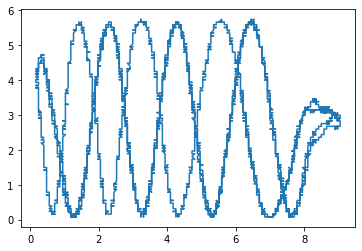

In [6]:
plt.plot(data[:,2], data[:,1])